Gradient : (1 - y_true)/(1 - p) - y_true/p
Hessienne : (1 - y_true)/(1 - p)**2 + y_true/p**2
Entropie croisée binaire est convexe pour p dans (0,1)


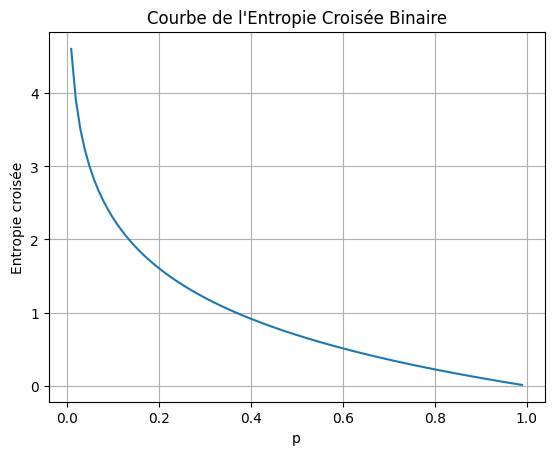

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)


In [1]:


#  Import des bibliothèques
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#  Jeu de données : classification
df_iris = pd.read_csv("./data/iris/iris.data", header=None,
                      names=['sepal_length','sepal_width','petal_length','petal_width','class'])
X = df_iris[['sepal_length','sepal_width']].head(50)
y = (df_iris['class'].head(50) == 'Iris-setosa').astype(int)  # 0/1

# Gradient et Hessienne Entropie Croisée Binaire
p, y_true = sp.symbols('p y_true')
L = - (y_true*sp.log(p) + (1-y_true)*sp.log(1-p))
grad = sp.diff(L, p)
hess = sp.diff(grad, p)
print("Gradient :", grad)
print("Hessienne :", hess)

#  Convexité
# Hessienne positive pour 0<p<1 => convexe
print("Entropie croisée binaire est convexe pour p dans (0,1)")

# Courbe de l'entropie croisée
y_val = 1  # exemple
L_func = sp.lambdify(p, L.subs(y_true, y_val), 'numpy')
p_vals = np.linspace(0.01,0.99,100)
plt.plot(p_vals, L_func(p_vals))
plt.xlabel('p')
plt.ylabel('Entropie croisée')
plt.title('Courbe de l\'Entropie Croisée Binaire')
plt.grid(True)
plt.show()

# Tangente à une ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5
ellipse = x**2/a**2 + y**2/b**2 - 1
grad_ellipse = [sp.diff(ellipse, var) for var in (x,y)]
tangent_eq = grad_ellipse[0]*(x - x0_val) + grad_ellipse[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)
